In [1]:
import plotly.graph_objs as go
import pandas as pd
from matchms.importing import load_from_msp
from matchms.logging_functions import set_matchms_logger_level

from utils import is_spectrum_for_compound, append_classes, load_spectra_metadata, normalize_df
from plotting import scatterplot_matplotlib

set_matchms_logger_level('ERROR')

In [2]:
matchms_scores = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.0035_1%I_all_peaks_with_0s_only_matching.tsv", sep="\t")
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_scores': 'scores'}, inplace=True)
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_matches': 'matches'}, inplace=True)

In [3]:
_ , spectra_metadata, _ = load_spectra_metadata("../data/filtered/simulated_matchms_filter_1%I_all_peaks.msp", 'query')
_ , reference_spectra_metadata, _ = load_spectra_metadata("../data/experimental/RECETOX_GC-EI_MS_20201028.msp", 'reference')

In [4]:
merged = matchms_scores.merge(spectra_metadata, on="query", how="inner")
merged.rename(columns={'num_peaks': 'n_peaks_query'}, inplace=True)

merged = merged.merge(reference_spectra_metadata, on="reference", how="inner")
merged.rename(columns={'num_peaks': 'n_peaks_reference'}, inplace=True)

numeric_columns = ['matches', 'n_peaks_query', 'n_peaks_reference']
merged[numeric_columns] = merged[numeric_columns].apply(pd.to_numeric, errors='coerce')

merged['FractionQuery'] = merged['matches'] / merged['n_peaks_query']
merged['FractionReference'] = merged['matches'] / merged['n_peaks_reference']

merged = append_classes(merged, "query")

/tmp/ipykernel_7333/1240452607.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  scatterplot_matplotlib(normalize_df(merged, matches_norm_col=None)).show()


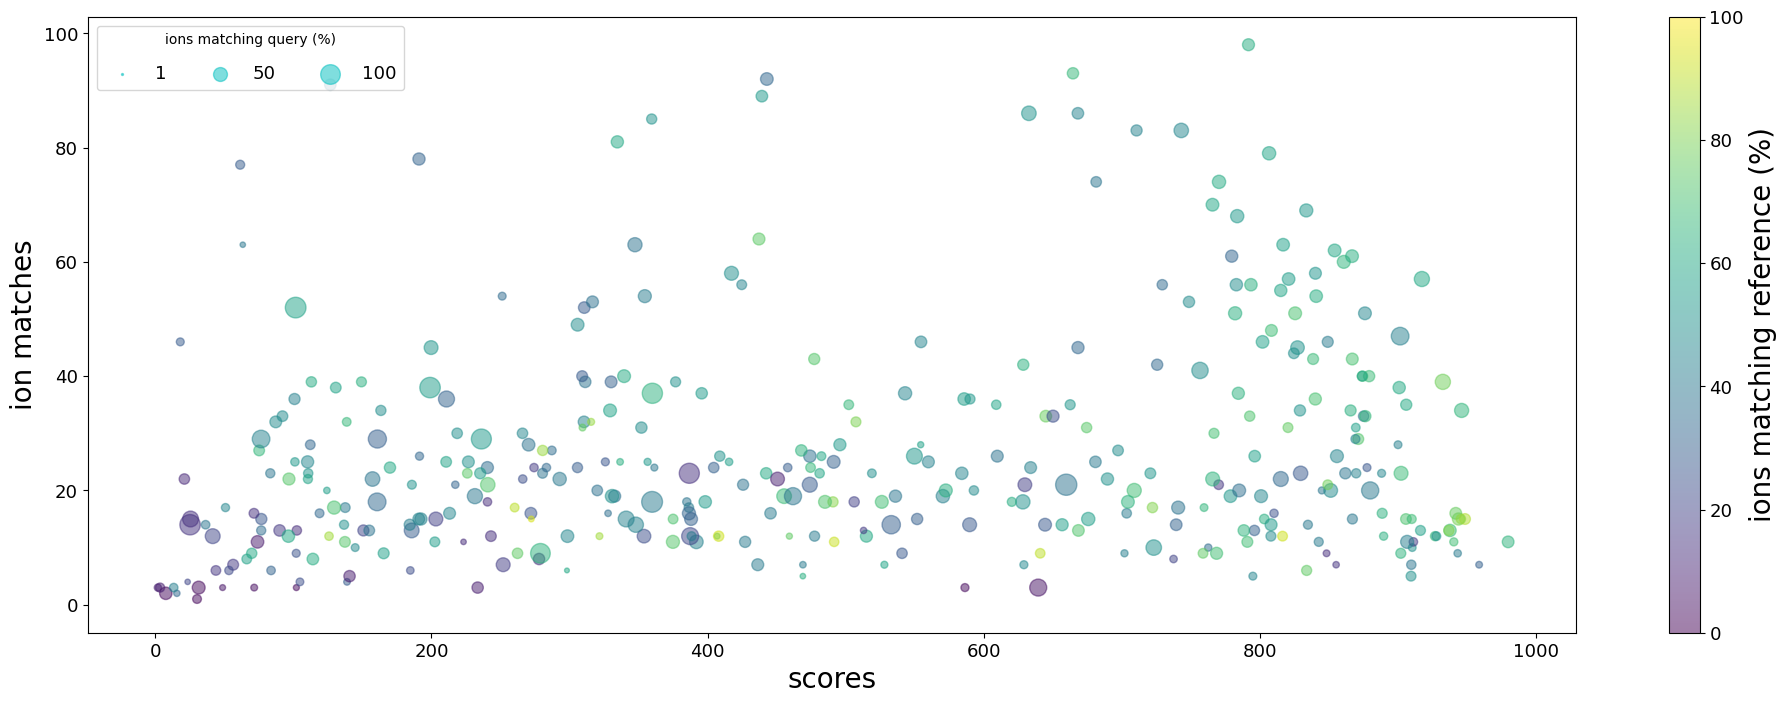

In [5]:
# Create a scatter plot
scatterplot_matplotlib(normalize_df(merged, matches_norm_col=None)).show()
# plot name in the manuscript:
# "20240517_scatterplot.png"
